In [1]:
#!/usr/bin/python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("F:/projects/Loan_Predictor/train.csv") 	#reading data into dataframe
df1 = pd.read_csv("F:/projects/Loan_Predictor/train_u6lujuX_CVtuZ9i.csv")
y=df.Loan_Status
print "THE DATASET------"
print df1
print df.describe()

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate          


Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,u'Probability of getting loan by credit history')

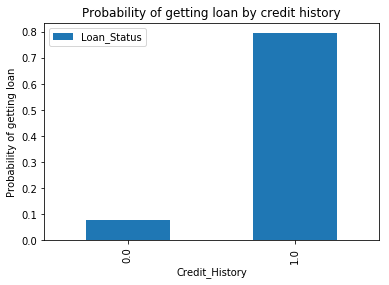

In [20]:

temp1 = df1.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print '\nProbility of getting loan for each Credit History class:' 
print temp1
ax1 = temp1.plot(kind= 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by credit history")


Probility of getting loan for each gender:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


Text(0.5,1,u'Probability of getting loan by Gender')

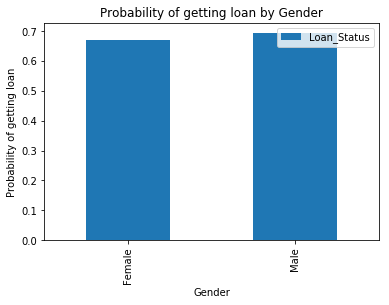

In [21]:
temp1 = df1.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print '\nProbility of getting loan for each gender:' 
print temp1
ax1 = temp1.plot(kind= 'bar')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by Gender")


Probility of getting loan by education:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940

Probility of getting loan by Self_Employed:
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


Histogram for loan amount data -----


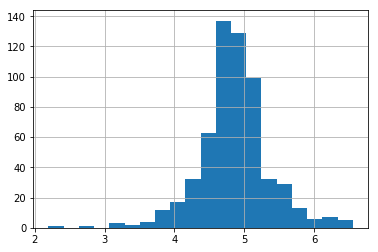

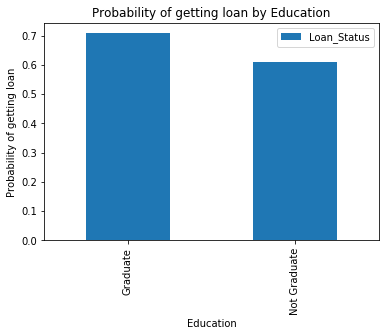

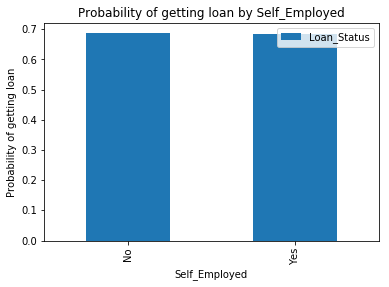

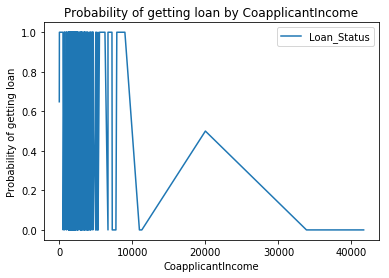

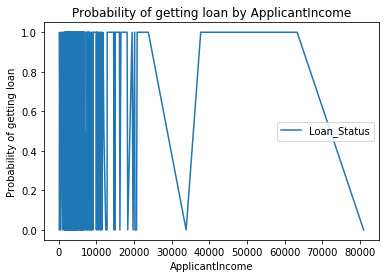

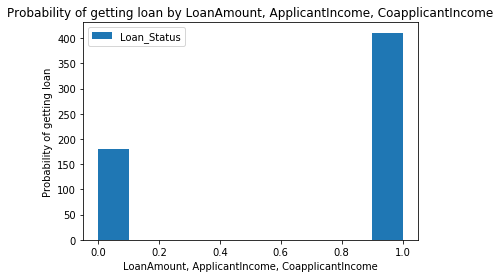

In [47]:

x = np.log(df1['LoanAmount'])
x.hist(bins=20) 
temp1 = df1.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print '\nProbility of getting loan by education:' 
print temp1
ax1 = temp1.plot(kind= 'bar')
ax1.set_xlabel('Education')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by Education")

temp1 = df1.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print '\nProbility of getting loan by Self_Employed:' 
print temp1
ax1 = temp1.plot(kind= 'bar')
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by Self_Employed")

temp1 = df1.pivot_table(values='Loan_Status',index=['CoapplicantIncome'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#print '\nProbility of getting loan by CoapplicantIncome:' 
#print temp1
ax1 = temp1.plot(kind= 'line')
ax1.set_xlabel('CoapplicantIncome')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by CoapplicantIncome")

temp1 = df1.pivot_table(values='Loan_Status',index=['ApplicantIncome'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#print '\nProbility of getting loan byApplicantIncome:' 
#print temp1
ax1 = temp1.plot(kind= 'line')
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by ApplicantIncome")


temp1 = df1.pivot_table(values='Loan_Status',index=['LoanAmount','ApplicantIncome','CoapplicantIncome'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#print '\nProbility of getting loan by LoanAmount:' 
#print temp1
ax1 = temp1.plot(kind= 'hist')
ax1.set_xlabel('LoanAmount, ApplicantIncome, CoapplicantIncome')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by LoanAmount, ApplicantIncome, CoapplicantIncome")
print "\n\nHistogram for loan amount data -----"

In [32]:
df = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

train_features,test_features,train_labels,test_labels = train_test_split(df, y, test_size=0.2, shuffle=False)

#print train_features.shape
#print train_labels.shape
#print test_features.shape
#print test_labels.shape

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier(n_estimators=30, min_samples_split=35,random_state=0)
clf.fit(train_features,train_labels)

pred = clf.predict(test_features)

from sklearn.metrics import accuracy_score
print "ACCURACY :", accuracy_score(test_labels,pred)


ACCURACY : 0.7967479674796748
